# **Final Project**

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import itertools
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mpl
import math
import sklearn
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
%matplotlib inline
plt.style.use('seaborn')

#### Importing/Checking Data

In [2]:
start = datetime.datetime(2010, 7, 13) # beginning time period data
end = datetime.datetime(2020, 7, 13) # ending time period data

df = web.DataReader("AAPL", 'yahoo', start, end) # Apple dataframe
df_2 = web.DataReader("MSFT", 'yahoo', start, end) # Microsoft dataframe
df_3 = web.DataReader("IBM", 'yahoo', start, end) # IBM dataframe

print(df.tail()) # tests for data accuracy: cross checked online to validate accuracy of given points
print(df_2.tail())
print(df_3.tail())

                  High         Low        Open       Close      Volume  \
Date                                                                     
2020-07-07  378.619995  372.230011  375.410004  372.690002  28106100.0   
2020-07-08  381.500000  376.359985  376.720001  381.369995  29273000.0   
2020-07-09  385.269989  378.690002  385.049988  383.010010  31410700.0   
2020-07-10  383.920013  378.820007  381.339996  383.679993  22564300.0   
2020-07-13  399.820007  381.029999  389.059998  381.910004  47912300.0   

             Adj Close  
Date                    
2020-07-07  372.690002  
2020-07-08  381.369995  
2020-07-09  383.010010  
2020-07-10  383.679993  
2020-07-13  381.910004  
                  High         Low        Open       Close      Volume  \
Date                                                                     
2020-07-07  214.669998  207.990005  210.449997  208.250000  33600700.0   
2020-07-08  213.259995  208.690002  210.070007  212.830002  33600000.0   
2020-07-09

# Rolling Moving Average

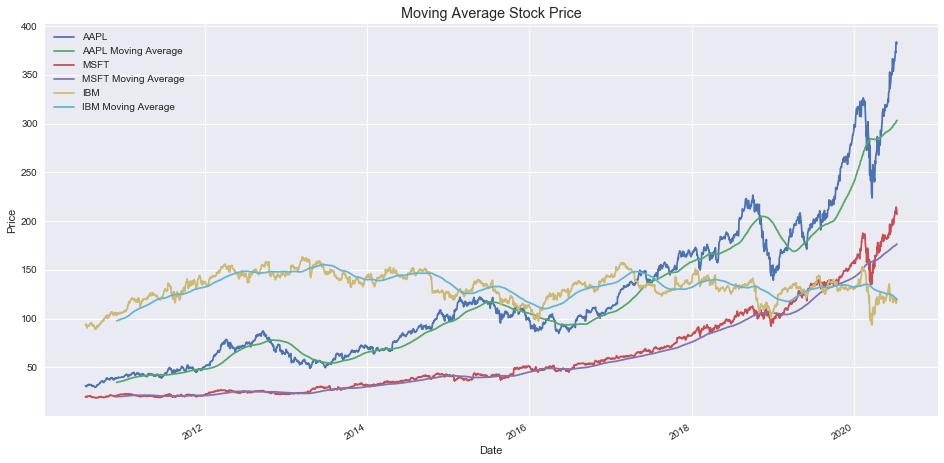

In [3]:
# AAPL
closing_price = df['Adj Close']
moving_avg = closing_price.rolling(window=100).mean() # Plotting an "averaged out" curve of each stock for a better view of the movement
mpl.rc('figure', figsize=(16, 8))
mpl.__version__
plt.ylabel('Price')
style.use('ggplot')
closing_price.plot(label='AAPL')
moving_avg.plot(label='AAPL Moving Average')
plt.legend()

# MSFT
closing_price = df_2['Adj Close']
moving_avg = closing_price.rolling(window=100).mean()
mpl.rc('figure', figsize=(16, 8))
mpl.__version__
plt.ylabel('Price')
style.use('ggplot')
closing_price.plot(label='MSFT')
moving_avg.plot(label='MSFT Moving Average')
plt.legend()

# IBM
closing_price = df_3['Adj Close']
moving_avg = closing_price.rolling(window=100).mean()
mpl.rc('figure', figsize=(16, 8))
mpl.__version__
plt.title('Moving Average Stock Price')
plt.ylabel('Price')
style.use('ggplot')
closing_price.plot(label='IBM')
moving_avg.plot(label='IBM Moving Average')
plt.legend()

# Correlation Analysis — Does one competitor affect others?

Text(0.5, 0.98, 'Scatter-Matrix Correlation Analysis')

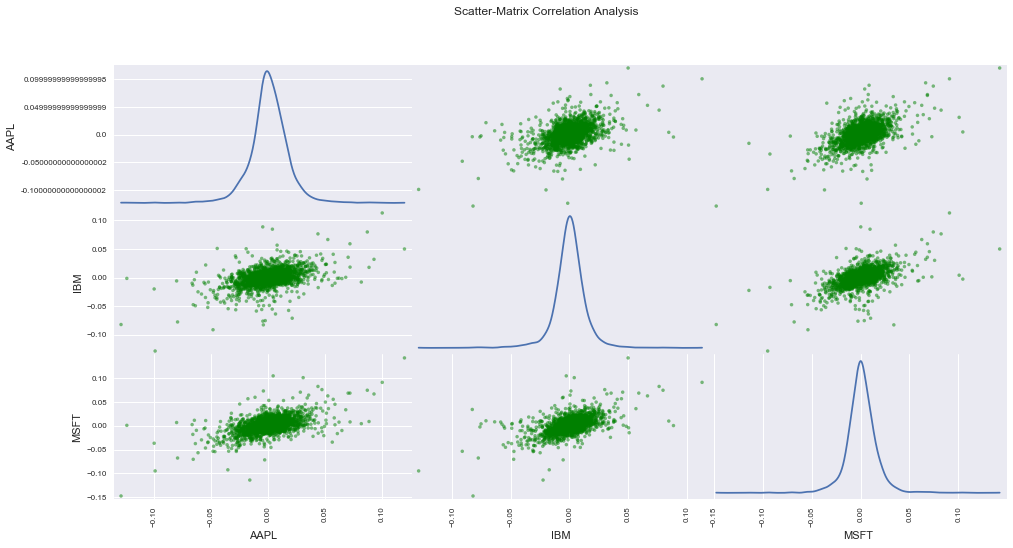

In [4]:
yahoo_data = web.DataReader(['AAPL', 'IBM', 'MSFT'],'yahoo',start=start,end=end)['Adj Close']
percent_change = yahoo_data.pct_change() # percent change between each stock movement
corr = percent_change.corr()
plt.style.use('seaborn')
pd.plotting.scatter_matrix(percent_change, diagonal='kde', figsize=(16, 8), c = 'green'); #plot differences in movements
plt.suptitle('Scatter-Matrix Correlation Analysis')

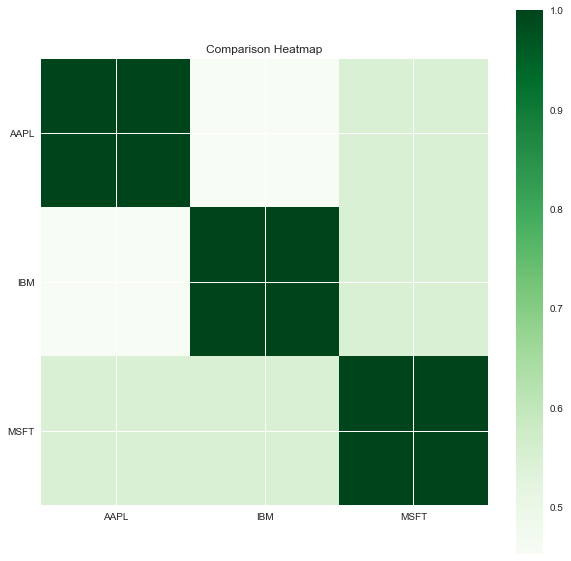

In [5]:
plt.figure(figsize=(10,10))
plt.imshow(corr, cmap='Greens', interpolation='none') #Greens cmap easy to visualize, simple to view above scatterplot in a more understandable format
plt.colorbar()
plt.title('Comparison Heatmap')
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

# Expected Return and Risk

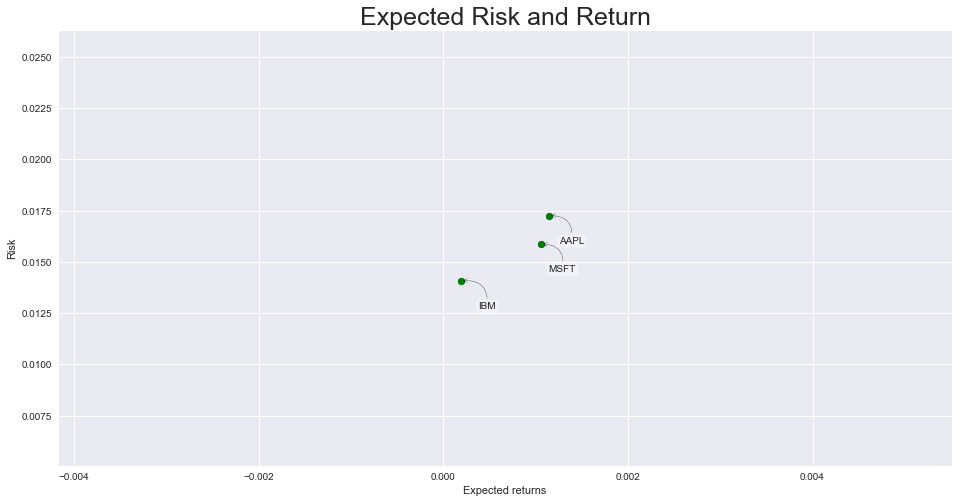

In [6]:
plt.figure(figsize=(16,8))
plt.scatter(percent_change.mean(), percent_change.std()) # use mean change and deviation to calculate R/R
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(percent_change.columns, percent_change.mean(), percent_change.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (35, -30),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.2', fc = 'white', alpha = 0.4),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0.6', color = 'Black'))
    plt.title('Expected Risk and Return', fontsize=25)
    plt.plot(x, y, 'bo', markersize=7, color = 'Green')

# Stock Price Prediction - AAPL

In [7]:
relevant_df = df.loc[:,['Adj Close','Volume']]
relevant_df['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
relevant_df['PCT_Change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
# Drop any potentially missing values
relevant_df.fillna(value=-99999, inplace=True)
# Take and separate 1% of the data in order to utilize it for forecasting
forecasted_out = int(math.ceil(0.01 * len(relevant_df)))
# Next steps are to predict the forecasted out closing values
forecast_col = 'Adj Close'
relevant_df['label'] = relevant_df[forecast_col].shift(-forecasted_out)
X = np.array(relevant_df.drop(['label'], 1))
# X is scaled so all the points are of the same distribution for linear regression analysis, preprocessing
X = preprocessing.scale(X)
X_lately = X[-forecasted_out:] #forecast out
X = X[:-forecasted_out]
y = np.array(relevant_df['label'])
y = y[:-forecasted_out]

C:\Users\Brand\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


##### Linear Regression, Quadratic Discriminant Analysis, & K Nearest Neighbors

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #split into the train/test groups

# Linear Regression
linear_regression = LinearRegression(n_jobs=-1)
linear_regression.fit(X_train, y_train)

# Quadratic Regression 2
quadratic_two = make_pipeline(PolynomialFeatures(2), Ridge())
quadratic_two.fit(X_train, y_train)

# Quadratic Regression 3
quadratic_three = make_pipeline(PolynomialFeatures(3), Ridge())
quadratic_three.fit(X_train, y_train)

# KNN Regression
k_nearest = KNeighborsRegressor(n_neighbors=5)
k_nearest.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

#### Evaluation of Methods

In [9]:
confidencereg = linear_regression.score(X_test, y_test) # Find confidence for each of the four initial methods
confidencepoly2 = quadratic_two.score(X_test,y_test)
confidencepoly3 = quadratic_three.score(X_test,y_test)
confidenceknn = k_nearest.score(X_test, y_test)

print('The linear regression confidence is ', (confidencereg*100).round(2), 'percent.')
print('The quadratic regression 2 confidence is ', (confidencepoly2*100).round(2), 'percent.')
print('The quadratic regression 3 confidence is ', (confidencepoly3*100).round(2), 'percent.')
print('The knn regression confidence is ', (confidenceknn*100).round(2), 'percent.')

The linear regression confidence is  95.95 percent.
The quadratic regression 2 confidence is  95.94 percent.
The quadratic regression 3 confidence is  96.03 percent.
The knn regression confidence is  94.97 percent.


#### Plotting Prediction for Linear Regression

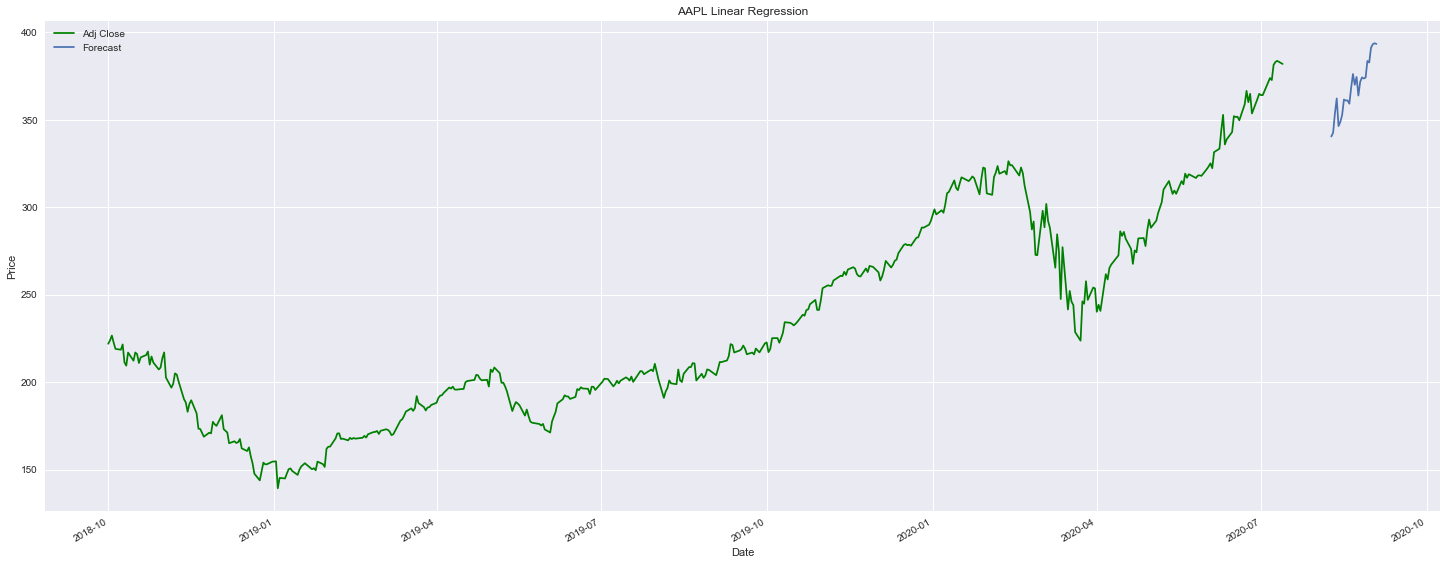

In [12]:
forecast_set = linear_regression.predict(X_lately)
relevant_df['Forecast'] = np.nan

final_tested_date = relevant_df.iloc[-1].name
latest_pred = final_tested_date
next_pred = latest_pred + datetime.timedelta(days=1)

for i in forecast_set: # calculate out the predicted values
    next_date = next_pred
    next_pred += datetime.timedelta(days=1)
    relevant_df.loc[next_date] = [np.nan for _ in range(len(relevant_df.columns)-1)]+[i]
plt.figure(figsize=(25,10))
relevant_df['Adj Close'].tail(500).plot(color = 'green')
relevant_df['Forecast'].tail(500).plot()
plt.legend(loc=2)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AAPL Linear Regression')
plt.show()

#### Plotting Prediction for Quadratic Regression 2

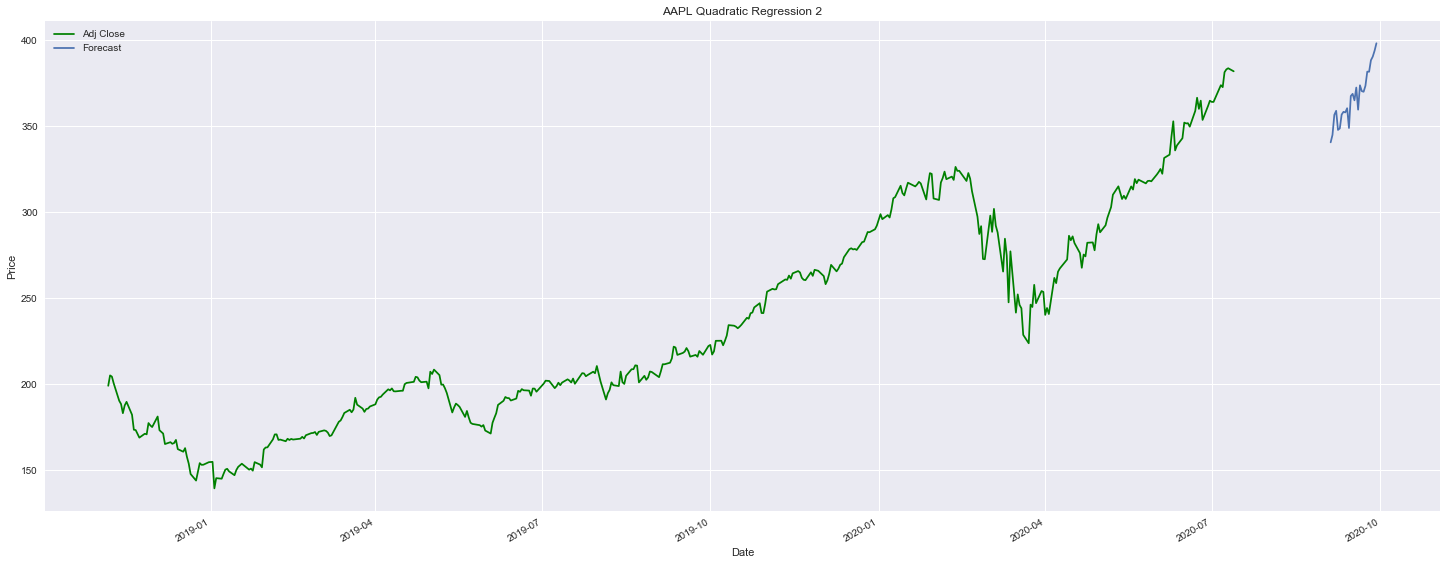

In [13]:
forecast_set = quadratic_two.predict(X_lately)
relevant_df['Forecast'] = np.nan

final_tested_date = relevant_df.iloc[-1].name
latest_pred = final_tested_date
next_pred = latest_pred + datetime.timedelta(days=1)

for i in forecast_set: # calculate out the predicted values
    next_date = next_pred
    next_pred += datetime.timedelta(days=1)
    relevant_df.loc[next_date] = [np.nan for _ in range(len(relevant_df.columns)-1)]+[i]
plt.figure(figsize=(25,10))
relevant_df['Adj Close'].tail(500).plot(color = 'green')
relevant_df['Forecast'].tail(500).plot()
plt.legend(loc=2)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AAPL Quadratic Regression 2')
plt.show()

#### Plotting Prediction for Quadratic Regression 3

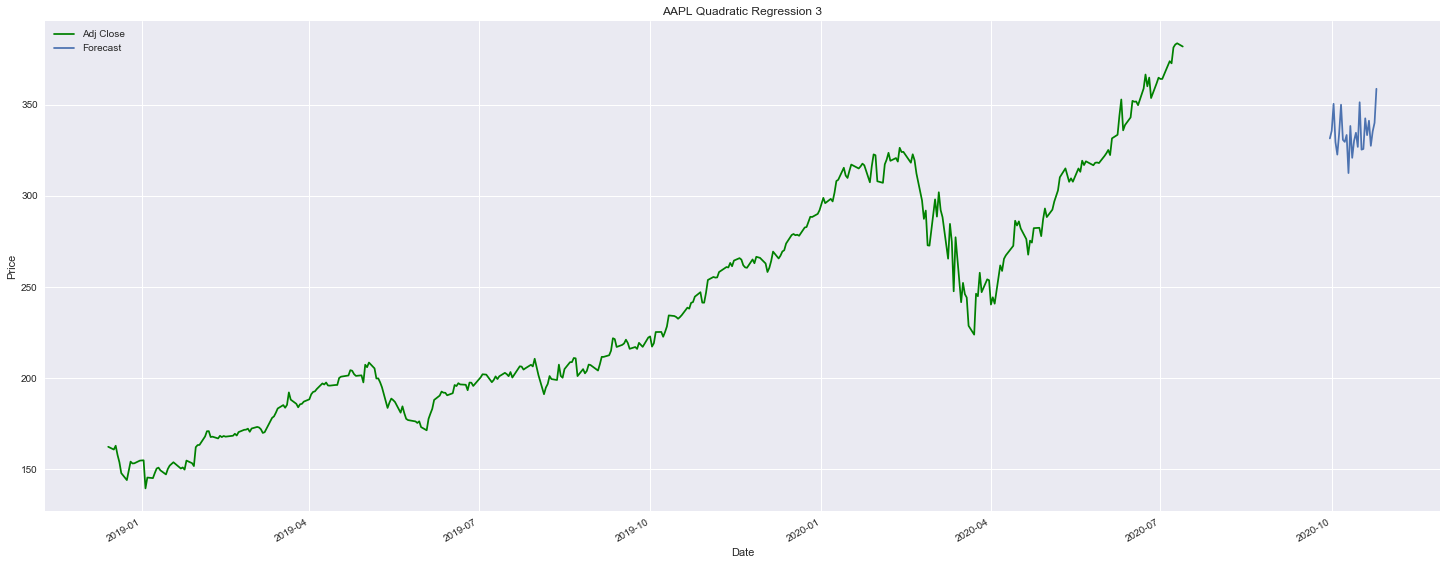

In [14]:
forecast_set = quadratic_three.predict(X_lately)
relevant_df['Forecast'] = np.nan

final_tested_date = relevant_df.iloc[-1].name
latest_pred = final_tested_date
next_pred = latest_pred + datetime.timedelta(days=1)

for i in forecast_set: # calculate out the predicted values
    next_date = next_pred
    next_pred += datetime.timedelta(days=1)
    relevant_df.loc[next_date] = [np.nan for _ in range(len(relevant_df.columns)-1)]+[i]
plt.figure(figsize=(25,10))
relevant_df['Adj Close'].tail(500).plot(color = 'green')
relevant_df['Forecast'].tail(500).plot()
plt.legend(loc=2)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AAPL Quadratic Regression 3')
plt.show()

#### Plotting Prediction for K Nearest Neighbors

Text(0, 0.5, 'Stock Price')

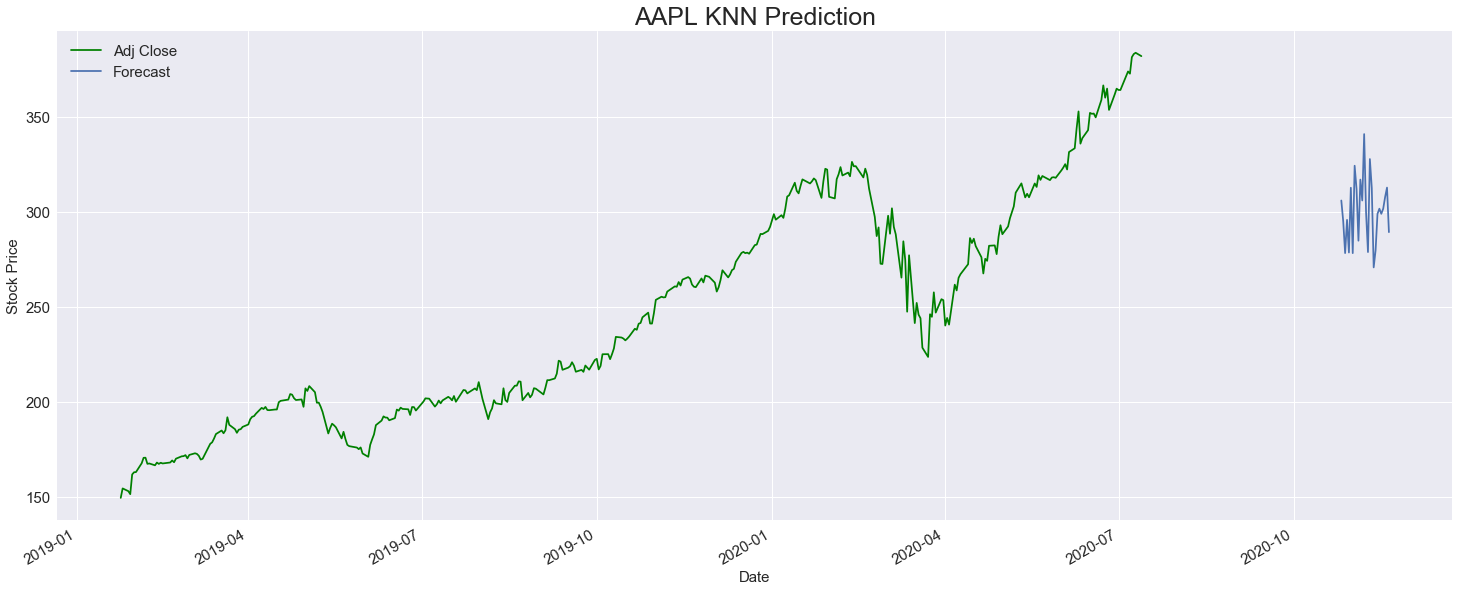

In [15]:
forecast_set = k_nearest.predict(X_lately)
relevant_df['Forecast'] = np.nan

final_tested_date = relevant_df.iloc[-1].name
latest_pred = final_tested_date
next_pred = latest_pred + datetime.timedelta(days=1)

for i in forecast_set: # calculate out the predicted values
    next_date = next_pred
    next_pred += datetime.timedelta(days=1)
    relevant_df.loc[next_date] = [np.nan for _ in range(len(relevant_df.columns)-1)]+[i]
plt.figure(figsize=(25,10))
plt.title('AAPL KNN Prediction', fontsize=25)
relevant_df['Adj Close'].tail(500).plot(fontsize=15, color = 'green') # 90 days historical data
relevant_df['Forecast'].tail(500).plot(fontsize=15) # 50 days future estimate
plt.legend(loc=2, fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Stock Price', fontsize=15)

#### Plotting Prediction for ARIMA 

In [16]:
y = df['Adj Close']
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = model.fit()
        except:
            continue
# Training the ARIMA model to predict new values
model = sm.tsa.statespace.SARIMAX(y, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12), enforce_stationarity=False,
                                            enforce_invertibility=False)
results = model.fit()

C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4169      0.028    -15.153      0.000      -0.471      -0.363
ma.L1          0.2155      0.030      7.164      0.000       0.157       0.274
ar.S.L12      -0.4689      0.007    -65.534      0.000      -0.483      -0.455
sigma2        10.6687      0.108     98.899      0.000      10.457      10.880


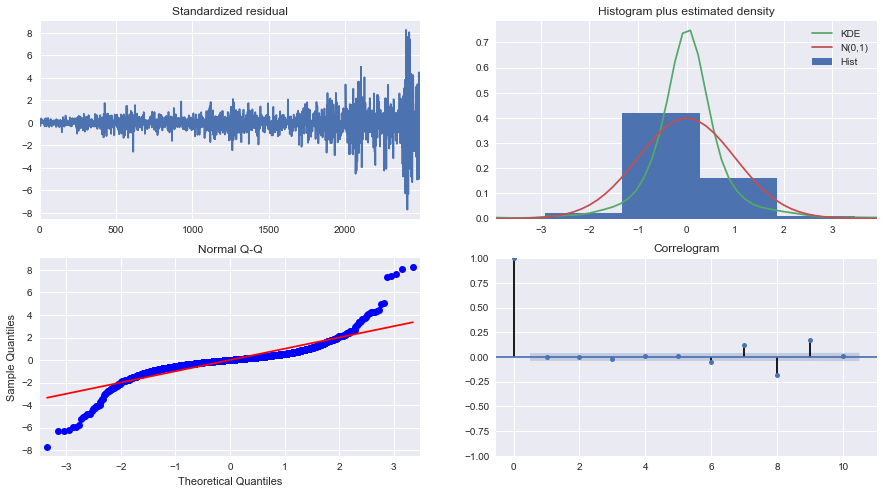

In [17]:
print(results.summary().tables[1]) #summary statistics
results.plot_diagnostics(figsize=(15, 8))
plt.show()

            lower Adj Close  upper Adj Close
Date                                        
2020-07-07       366.393026       379.196698
2020-07-08       366.838658       379.642330
2020-07-09       376.550595       389.354267
2020-07-10       385.788165       398.591837
2020-07-13       376.138660       388.942331
Mean Square Error is: 120.4669
Root Mean Square Error is: 10.975742523960523


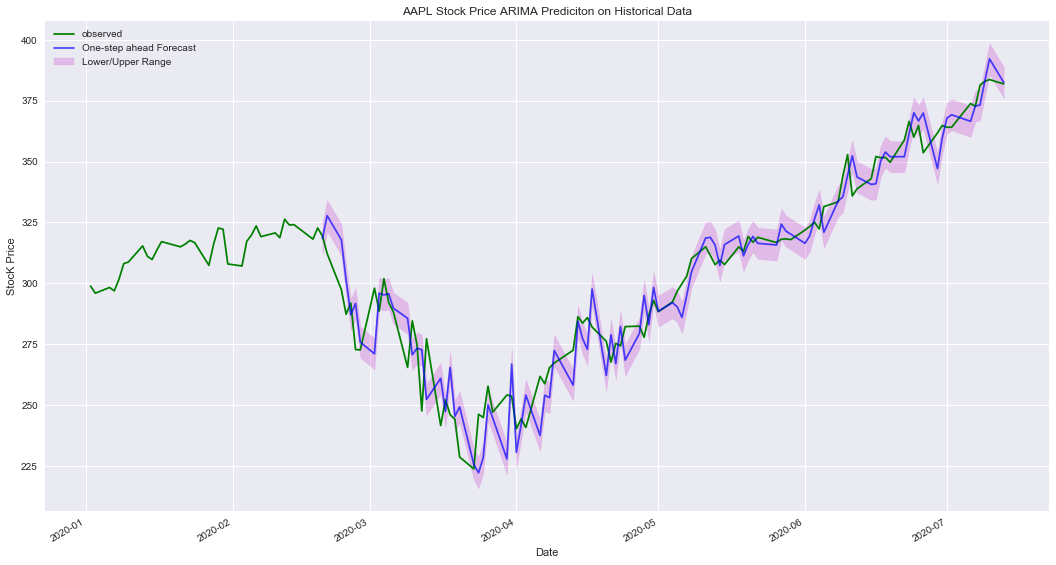

In [18]:
pred = results.get_prediction(start=('2020-02-20'), dynamic=False)
predicted_confidence_interval = pred.conf_int()
print(predicted_confidence_interval.tail())
ax = y['2020':].plot(label='observed', color = 'Green')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(18, 10), color = 'blue')
ax.fill_between(predicted_confidence_interval.index, #error range
                predicted_confidence_interval.iloc[:, 0],
                predicted_confidence_interval.iloc[:, 1], color='m', alpha=.2, label = 'Lower/Upper Range')
ax.set_xlabel('Date')
ax.set_ylabel('StocK Price')
plt.title('AAPL Stock Price ARIMA Prediciton on Historical Data')
plt.legend()

y_predicted = pred.predicted_mean
y_true = y['2017-01-01':]
mse = ((y_predicted - y_true)**2).mean()
print('Mean Square Error is:', round(mse, 4))
print('Root Mean Square Error is:', np.sqrt(mse)) #show potential error range

C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


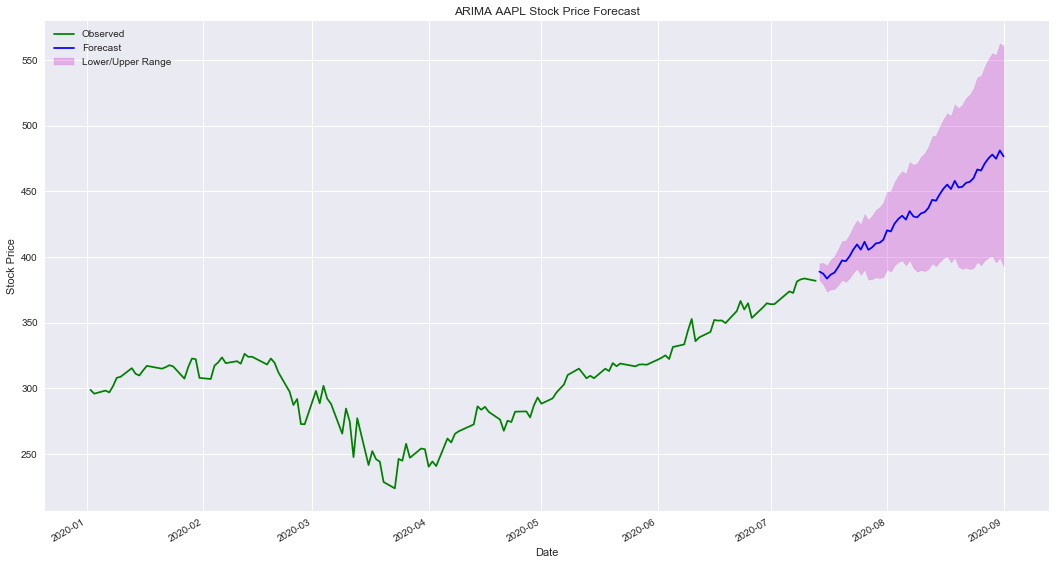

In [19]:
arima_forecast = results.get_forecast(steps=50) # Forecast 50 days into the future

predicted_confidence_interval = arima_forecast.conf_int()
predicted_confidence_interval['Date'] = pd.date_range(start='2020-7-14', periods=len(predicted_confidence_interval), freq='D')
predicted_confidence_interval.set_index('Date', inplace=True)

predicted_confidence_interval['Mean'] = (predicted_confidence_interval['lower Adj Close'] + predicted_confidence_interval['upper Adj Close']) / 2
predicted_confidence_interval.head()

ax = y['2020'].plot(label='Observed', figsize=(18, 10), color = 'Green') #here and below: plot the observances + confidence interval for the future
predicted_confidence_interval['Mean'].plot(ax=ax, label='Forecast', color = 'blue')
ax.fill_between(predicted_confidence_interval.index,
                predicted_confidence_interval.iloc[:, 0],
                predicted_confidence_interval.iloc[:, 1], color = 'm', alpha=.25, label = 'Lower/Upper Range')
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
plt.title('ARIMA AAPL Stock Price Forecast')
plt.legend(loc = 2)
plt.show()

# Stock Price Prediction - MSFT

In [20]:
df = df_2 # for comments refer to AAPL for documentation, applies to all below code
relevant_df = df.loc[:,['Adj Close','Volume']]
relevant_df['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
relevant_df['PCT_Change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
relevant_df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(relevant_df)))
forecast_col = 'Adj Close'
relevant_df['label'] = relevant_df[forecast_col].shift(-forecast_out)
X = np.array(relevant_df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
y = np.array(relevant_df['label'])
y = y[:-forecast_out]

##### Linear Regression, Quadratic Discriminant Analysis, & K Nearest Neighbors

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Linear regression
linear_regression = LinearRegression(n_jobs=-1)
linear_regression.fit(X_train, y_train)

# Quadratic Regression 2
quadratic_two = make_pipeline(PolynomialFeatures(2), Ridge())
quadratic_two.fit(X_train, y_train)

# Quadratic Regression 3
quadratic_three = make_pipeline(PolynomialFeatures(3), Ridge())
quadratic_three.fit(X_train, y_train)

# KNN Regression
k_nearest = KNeighborsRegressor(n_neighbors=5)
k_nearest.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

##### Evaluation of Methods

In [22]:
confidencereg = linear_regression.score(X_test, y_test)
confidencepoly2 = quadratic_two.score(X_test,y_test)
confidencepoly3 = quadratic_three.score(X_test,y_test)
confidenceknn = k_nearest.score(X_test, y_test)

print('The linear regression confidence is ', (confidencereg*100).round(2), 'percent.')
print('The quadratic regression 2 confidence is ', (confidencepoly2*100).round(2), 'percent.')
print('The quadratic regression 3 confidence is ', (confidencepoly3*100).round(2), 'percent.')
print('The knn regression confidence is ', (confidenceknn*100).round(2), 'percent.')

The linear regression confidence is  98.49 percent.
The quadratic regression 2 confidence is  98.58 percent.
The quadratic regression 3 confidence is  98.61 percent.
The knn regression confidence is  96.95 percent.


##### Plotting Prediction for Linear Regression

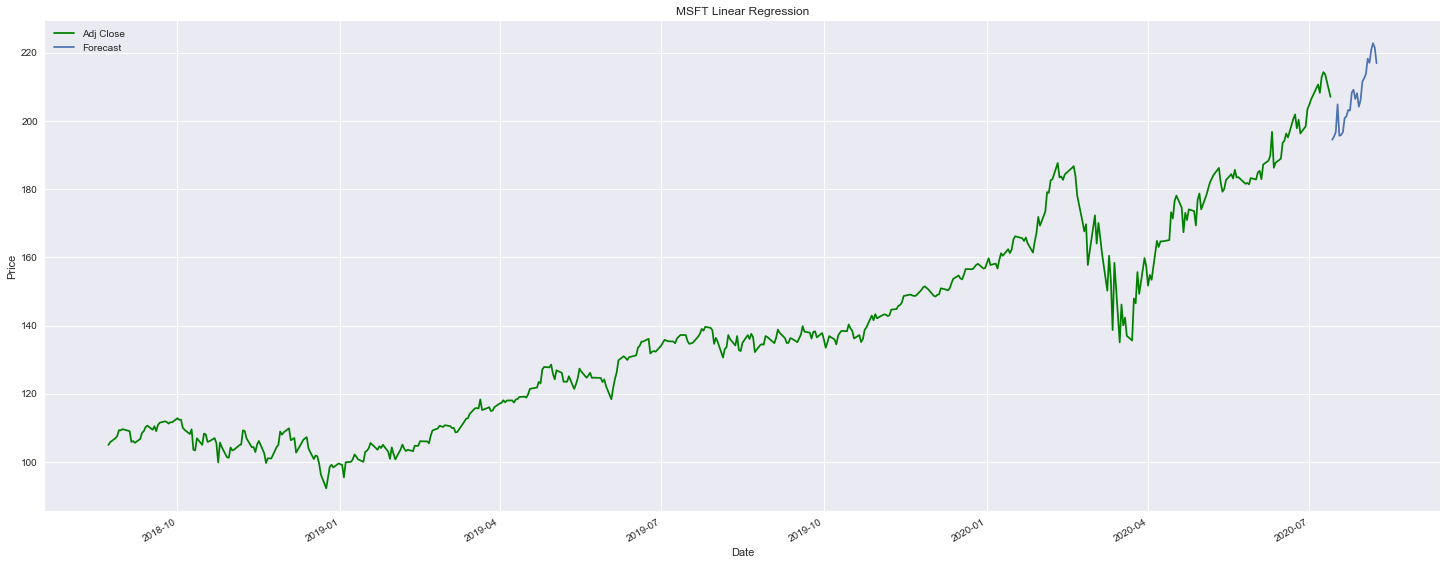

In [23]:
forecast_set = linear_regression.predict(X_lately)
relevant_df['Forecast'] = np.nan

final_tested_date = relevant_df.iloc[-1].name
latest_pred = final_tested_date
next_pred = latest_pred + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_pred
    next_pred += datetime.timedelta(days=1)
    relevant_df.loc[next_date] = [np.nan for _ in range(len(relevant_df.columns)-1)]+[i]
plt.figure(figsize=(25,10))
relevant_df['Adj Close'].tail(500).plot(color = 'green')
relevant_df['Forecast'].tail(500).plot()
plt.legend(loc=2)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('MSFT Linear Regression')
plt.show()

##### Plotting Prediction for Quadratic Regression 2

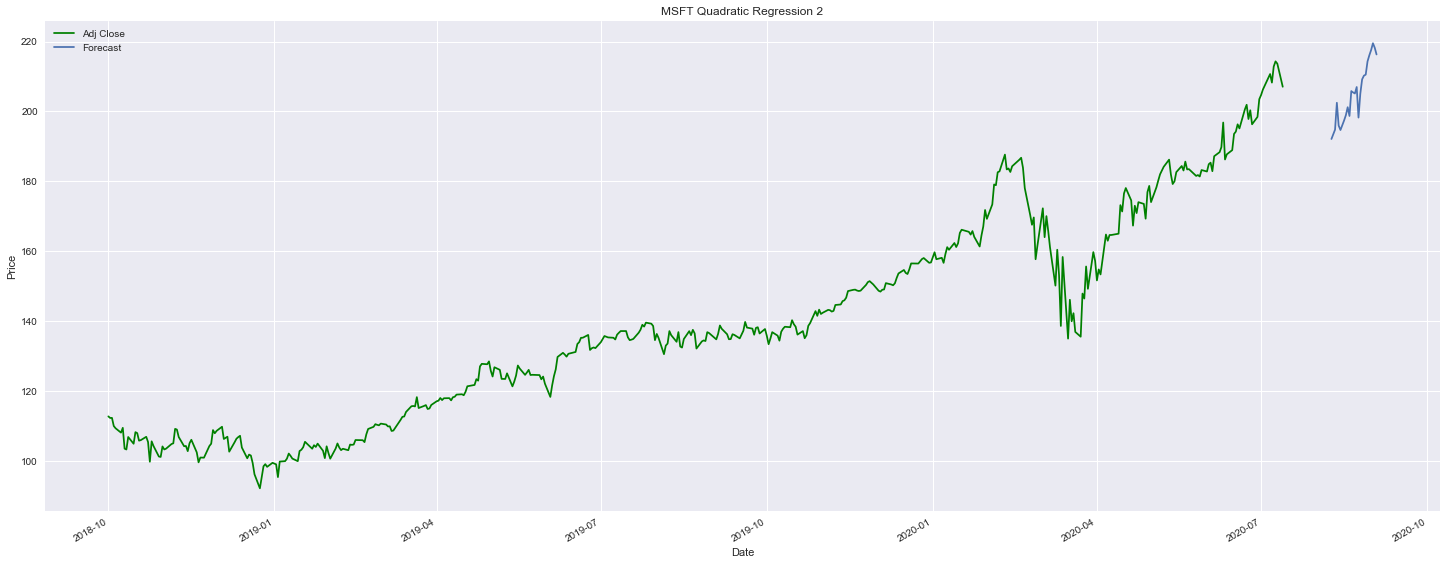

In [24]:
forecast_set = quadratic_two.predict(X_lately)
relevant_df['Forecast'] = np.nan

final_tested_date = relevant_df.iloc[-1].name
latest_pred = final_tested_date
next_pred = latest_pred + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_pred
    next_pred += datetime.timedelta(days=1)
    relevant_df.loc[next_date] = [np.nan for _ in range(len(relevant_df.columns)-1)]+[i]
plt.figure(figsize=(25,10))
relevant_df['Adj Close'].tail(500).plot(color = 'green')
relevant_df['Forecast'].tail(500).plot()
plt.legend(loc=2)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('MSFT Quadratic Regression 2')
plt.show()

##### Plotting Prediction for Quadratic Regression 3

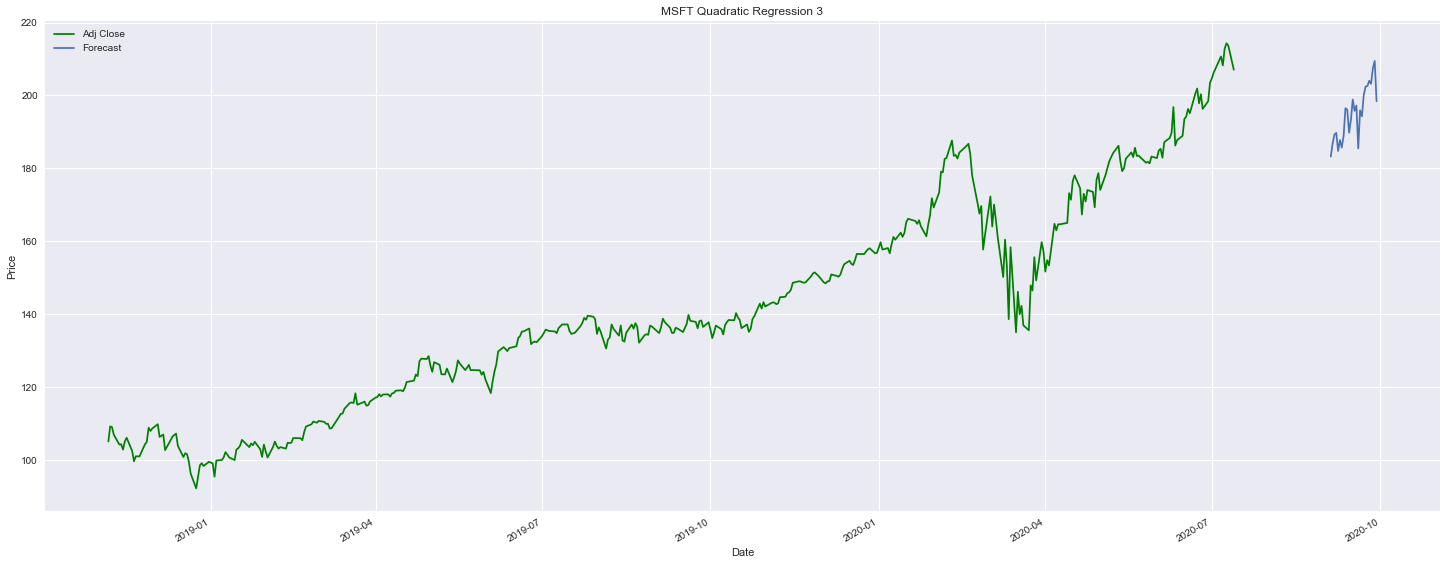

In [25]:
forecast_set = quadratic_three.predict(X_lately)
relevant_df['Forecast'] = np.nan

final_tested_date = relevant_df.iloc[-1].name
latest_pred = final_tested_date
next_pred = latest_pred + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_pred
    next_pred += datetime.timedelta(days=1)
    relevant_df.loc[next_date] = [np.nan for _ in range(len(relevant_df.columns)-1)]+[i]
plt.figure(figsize=(25,10))
relevant_df['Adj Close'].tail(500).plot(color = 'green')
relevant_df['Forecast'].tail(500).plot()
plt.legend(loc=2)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('MSFT Quadratic Regression 3')
plt.show()

##### Plotting Prediction for K Nearest Neighbors

Text(0, 0.5, 'Stock Price')

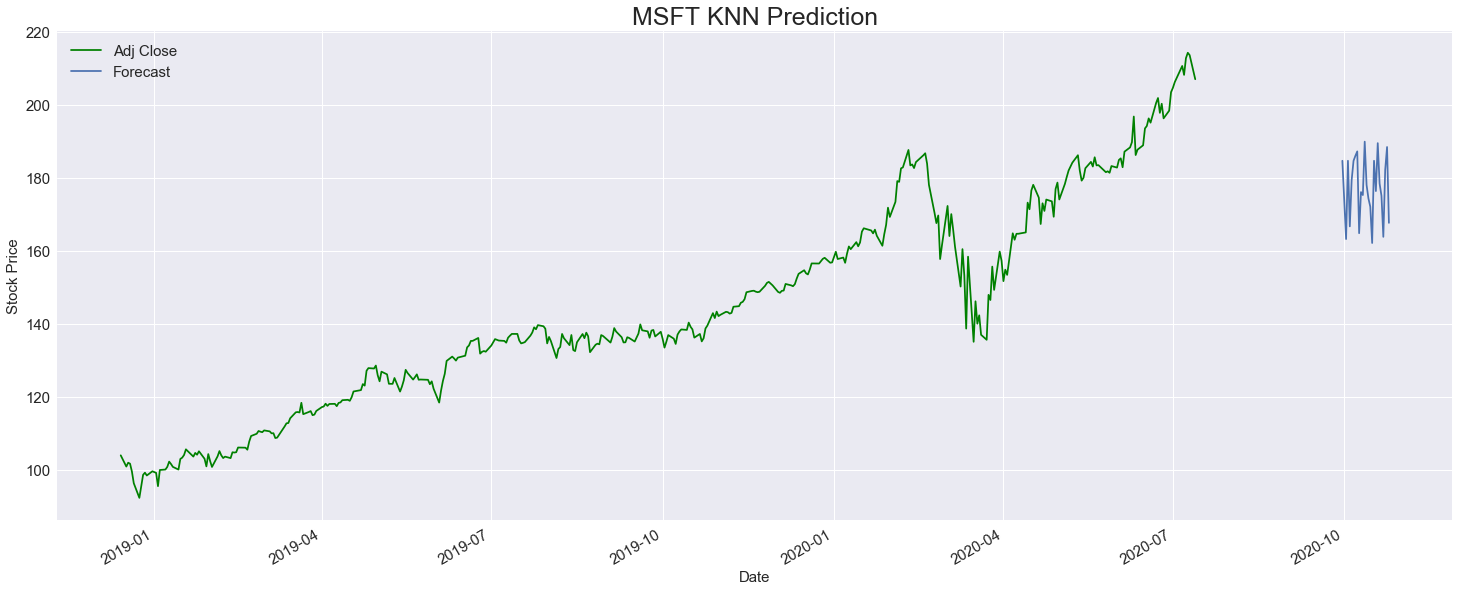

In [26]:
forecast_set = k_nearest.predict(X_lately)
relevant_df['Forecast'] = np.nan

final_tested_date = relevant_df.iloc[-1].name
latest_pred = final_tested_date
next_pred = latest_pred + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_pred
    next_pred += datetime.timedelta(days=1)
    relevant_df.loc[next_date] = [np.nan for _ in range(len(relevant_df.columns)-1)]+[i]
plt.figure(figsize=(25,10))
plt.title('MSFT KNN Prediction', fontsize=25)
relevant_df['Adj Close'].tail(500).plot(fontsize=15, color = 'green') # 90 days historical data
relevant_df['Forecast'].tail(500).plot(fontsize=15) # 50 days future estimate
plt.legend(loc=2, fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Stock Price', fontsize=15)

##### Plotting Prediction for ARIMA

In [27]:
y = df['Adj Close']
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = model.fit()
        except:
            continue
model = sm.tsa.statespace.SARIMAX(y, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12), enforce_stationarity=False,
                                            enforce_invertibility=False)
results = model.fit()

C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3984      0.016    -25.336      0.000      -0.429      -0.368
ma.L1          0.0715      0.017      4.142      0.000       0.038       0.105
ar.S.L12      -0.4472      0.005    -82.168      0.000      -0.458      -0.437
sigma2         2.9993      0.023    130.867      0.000       2.954       3.044


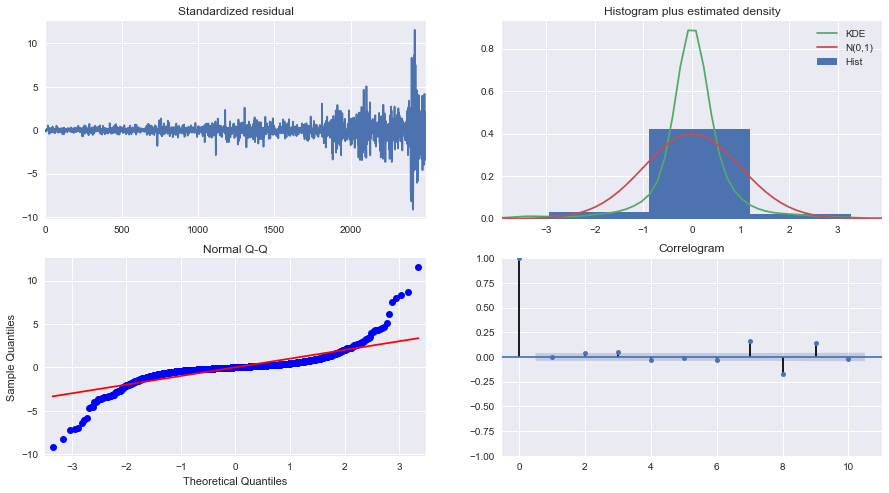

In [28]:
print(results.summary().tables[1])
results.plot_diagnostics(figsize=(15, 8))
plt.show()

            lower Adj Close  upper Adj Close
Date                                        
2020-07-07       207.950252       214.739000
2020-07-08       205.993697       212.782445
2020-07-09       209.584476       216.373224
2020-07-10       213.841640       220.630388
2020-07-13       209.606174       216.394922
Mean Square Error is: 42.5655
Root Mean Square Error is: 6.52422307356729


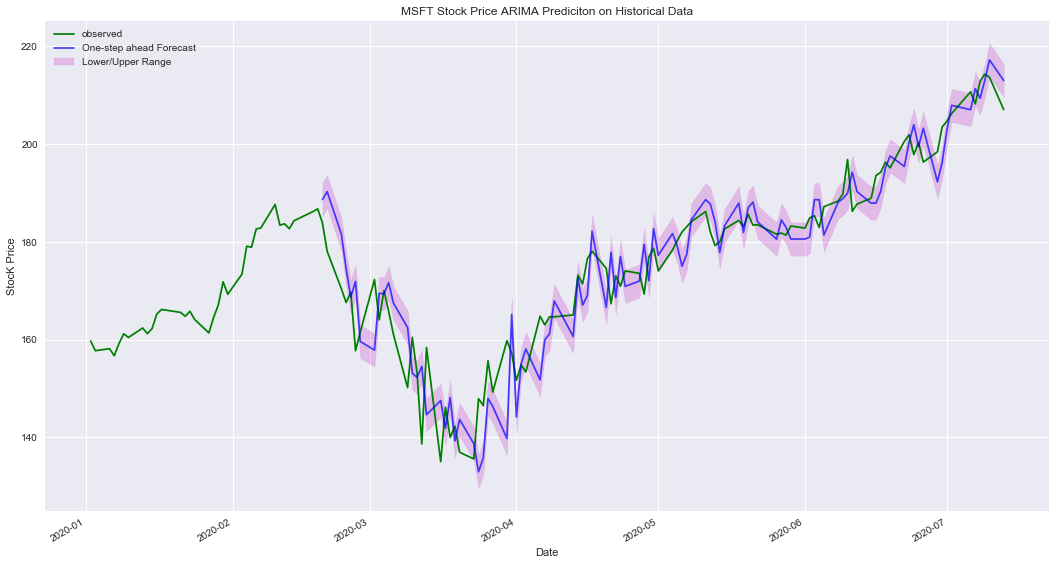

In [29]:
pred = results.get_prediction(start=('2020-02-20'), dynamic=False)
predicted_confidence_interval = pred.conf_int()
print(predicted_confidence_interval.tail())
ax = y['2020':].plot(label='observed', color = 'Green')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(18, 10), color = 'blue')
ax.fill_between(predicted_confidence_interval.index,
                predicted_confidence_interval.iloc[:, 0],
                predicted_confidence_interval.iloc[:, 1], color='m', alpha=.2, label = 'Lower/Upper Range')
ax.set_xlabel('Date')
ax.set_ylabel('StocK Price')
plt.title('MSFT Stock Price ARIMA Prediciton on Historical Data')
plt.legend()

y_predicted = pred.predicted_mean
y_true = y['2017-01-01':]
mse = ((y_predicted - y_true)**2).mean()
print('Mean Square Error is:', round(mse, 4))
print('Root Mean Square Error is:', np.sqrt(mse))

C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


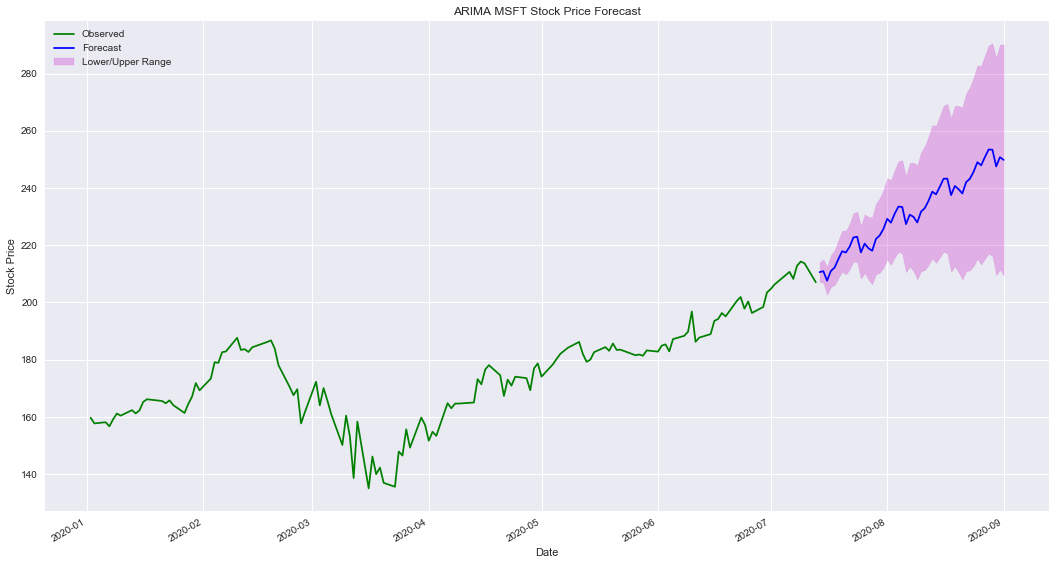

In [30]:
arima_forecast = results.get_forecast(steps=50) # Forecast 50 days into the future

predicted_confidence_interval = arima_forecast.conf_int()
predicted_confidence_interval['Date'] = pd.date_range(start='2020-7-14', periods=len(predicted_confidence_interval), freq='D')
predicted_confidence_interval.set_index('Date', inplace=True)

predicted_confidence_interval['Mean'] = (predicted_confidence_interval['lower Adj Close'] + predicted_confidence_interval['upper Adj Close']) / 2
predicted_confidence_interval.head()

ax = y['2020'].plot(label='Observed', figsize=(18, 10), color = 'Green')
predicted_confidence_interval['Mean'].plot(ax=ax, label='Forecast', color = 'blue')
ax.fill_between(predicted_confidence_interval.index,
                predicted_confidence_interval.iloc[:, 0],
                predicted_confidence_interval.iloc[:, 1], color = 'm', alpha=.25, label = 'Lower/Upper Range')
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
plt.title('ARIMA MSFT Stock Price Forecast')
plt.legend(loc = 2)
plt.show()

# Stock Price Prediction - IBM

In [31]:
df = df_3 # for comments refer to AAPL for documentation, applies to all below code
relevant_df = df.loc[:,['Adj Close','Volume']]
relevant_df['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
relevant_df['PCT_Change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
relevant_df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(relevant_df)))
forecast_col = 'Adj Close'
relevant_df['label'] = relevant_df[forecast_col].shift(-forecast_out)
X = np.array(relevant_df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
y = np.array(relevant_df['label'])
y = y[:-forecast_out]

##### Linear Regression, Quadratic Discriminant Analysis, & K Nearest Neighbors

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Linear regression
linear_regression = LinearRegression(n_jobs=-1)
linear_regression.fit(X_train, y_train)

# Quadratic Regression 2
quadratic_two = make_pipeline(PolynomialFeatures(2), Ridge())
quadratic_two.fit(X_train, y_train)

# Quadratic Regression 3
quadratic_three = make_pipeline(PolynomialFeatures(3), Ridge())
quadratic_three.fit(X_train, y_train)

# KNN Regression
k_nearest = KNeighborsRegressor(n_neighbors=5)
k_nearest.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

##### Evaluation of Methods

In [33]:
confidencereg = linear_regression.score(X_test, y_test)
confidencepoly2 = quadratic_two.score(X_test,y_test)
confidencepoly3 = quadratic_three.score(X_test,y_test)
confidenceknn = k_nearest.score(X_test, y_test)

print('The linear regression confidence is ', (confidencereg*100).round(2), 'percent.')
print('The quadratic regression 2 confidence is ', (confidencepoly2*100).round(2), 'percent.')
print('The quadratic regression 3 confidence is ', (confidencepoly3*100).round(2), 'percent.')
print('The knn regression confidence is ', (confidenceknn*100).round(2), 'percent.')

The linear regression confidence is  67.22 percent.
The quadratic regression 2 confidence is  69.35 percent.
The quadratic regression 3 confidence is  68.97 percent.
The knn regression confidence is  64.09 percent.


##### Plotting Prediction for Linear Regression

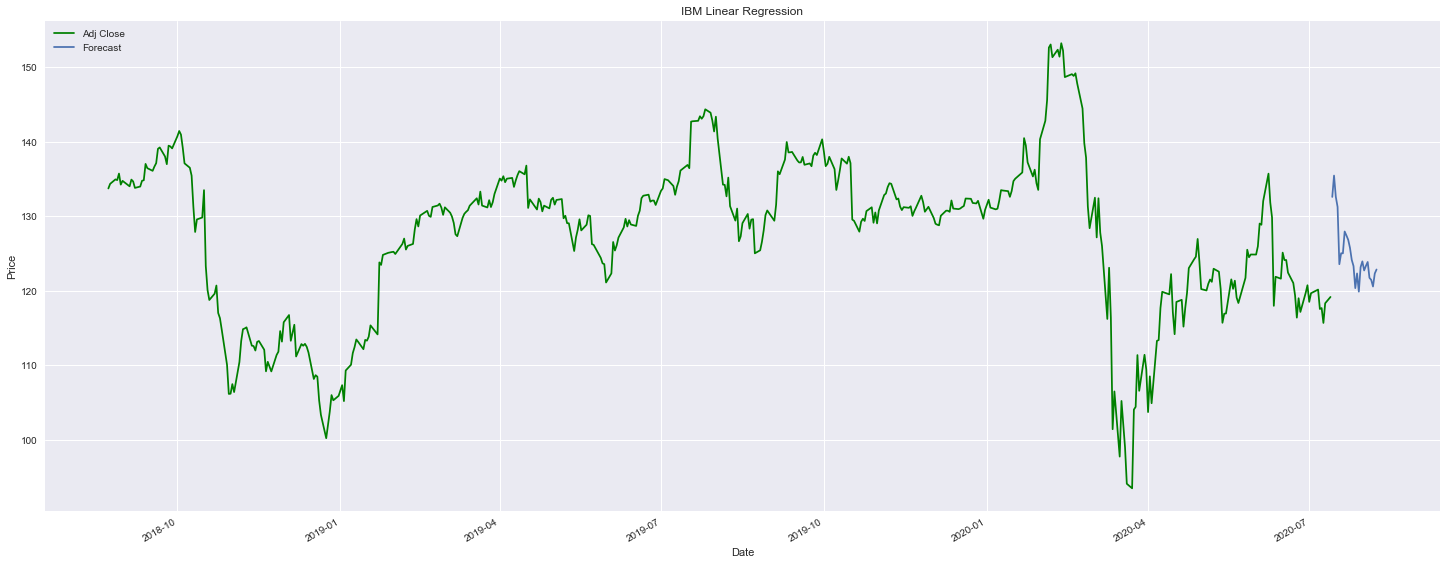

In [34]:
forecast_set = linear_regression.predict(X_lately)
relevant_df['Forecast'] = np.nan

final_tested_date = relevant_df.iloc[-1].name
latest_pred = final_tested_date
next_pred = latest_pred + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_pred
    next_pred += datetime.timedelta(days=1)
    relevant_df.loc[next_date] = [np.nan for _ in range(len(relevant_df.columns)-1)]+[i]
plt.figure(figsize=(25,10))
relevant_df['Adj Close'].tail(500).plot(color = 'green')
relevant_df['Forecast'].tail(500).plot()
plt.legend(loc=2)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('IBM Linear Regression')
plt.show()

##### Plotting Prediction for Quadratic Regression 2

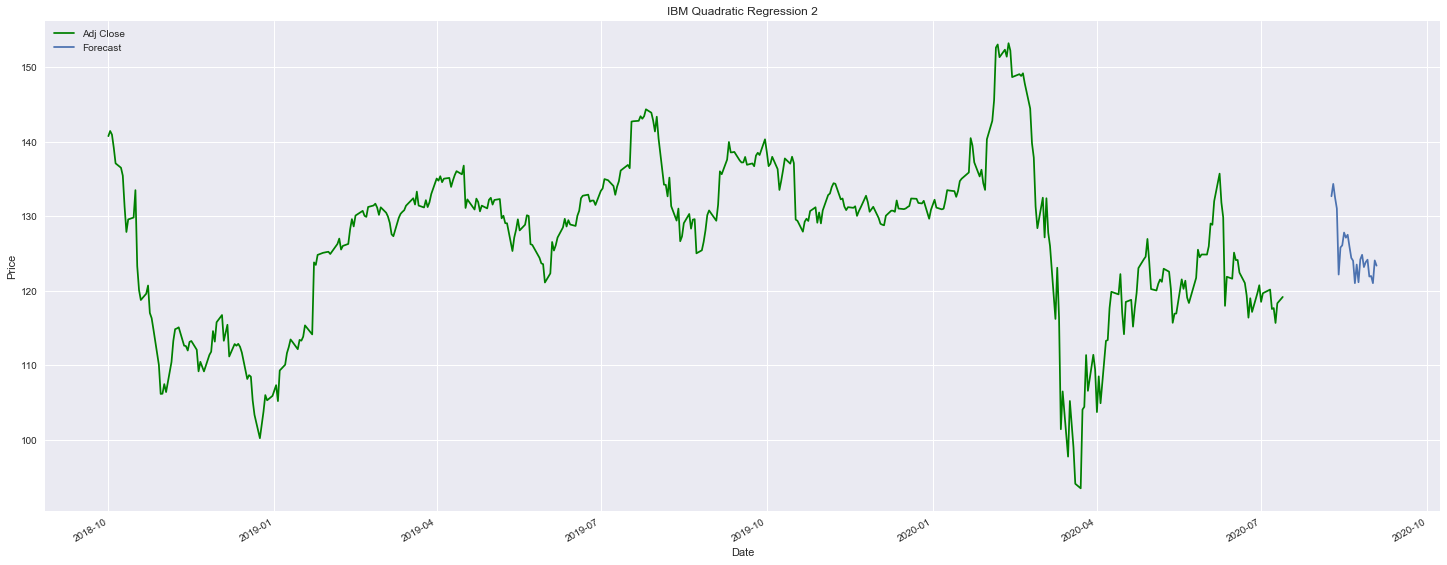

In [35]:
forecast_set = quadratic_two.predict(X_lately)
relevant_df['Forecast'] = np.nan

final_tested_date = relevant_df.iloc[-1].name
latest_pred = final_tested_date
next_pred = latest_pred + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_pred
    next_pred += datetime.timedelta(days=1)
    relevant_df.loc[next_date] = [np.nan for _ in range(len(relevant_df.columns)-1)]+[i]
plt.figure(figsize=(25,10))
relevant_df['Adj Close'].tail(500).plot(color = 'green')
relevant_df['Forecast'].tail(500).plot()
plt.legend(loc=2)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('IBM Quadratic Regression 2')
plt.show()

##### Plotting Prediction for Quadratic Regression 3

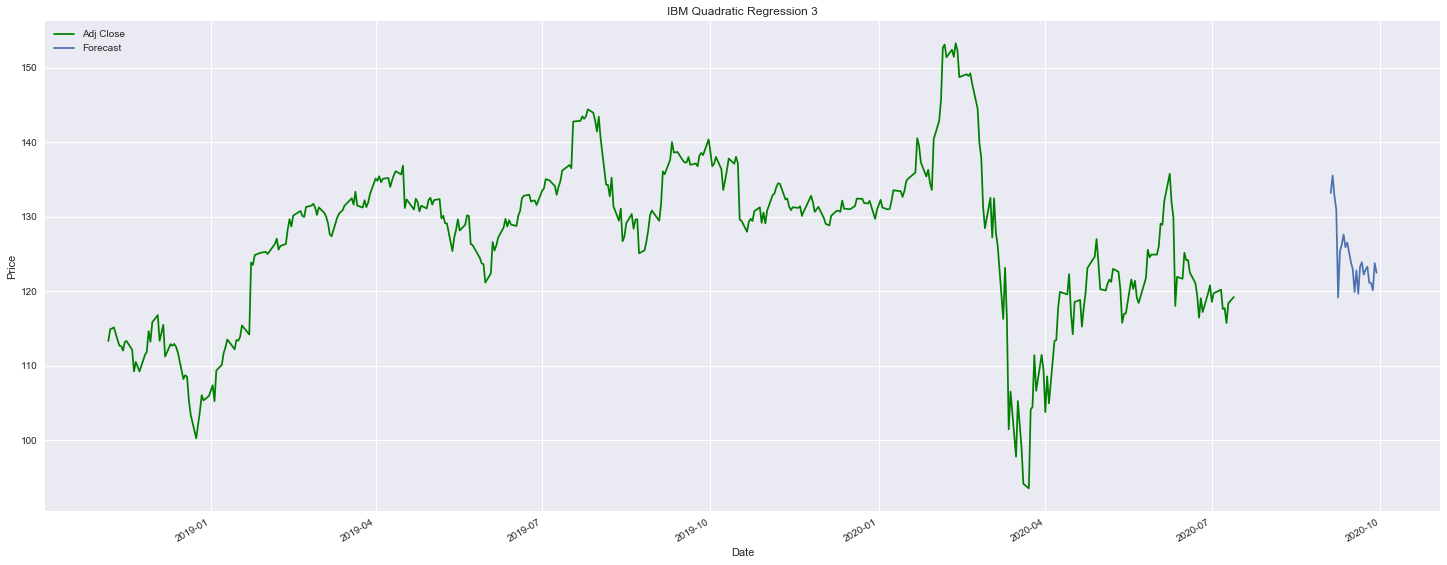

In [36]:
forecast_set = quadratic_three.predict(X_lately)
relevant_df['Forecast'] = np.nan

final_tested_date = relevant_df.iloc[-1].name
latest_pred = final_tested_date
next_pred = latest_pred + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_pred
    next_pred += datetime.timedelta(days=1)
    relevant_df.loc[next_date] = [np.nan for _ in range(len(relevant_df.columns)-1)]+[i]
plt.figure(figsize=(25,10))
relevant_df['Adj Close'].tail(500).plot(color = 'green')
relevant_df['Forecast'].tail(500).plot()
plt.legend(loc=2)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('IBM Quadratic Regression 3')
plt.show()

##### Plotting Prediction for K Nearest Neighbors

Text(0, 0.5, 'Stock Price')

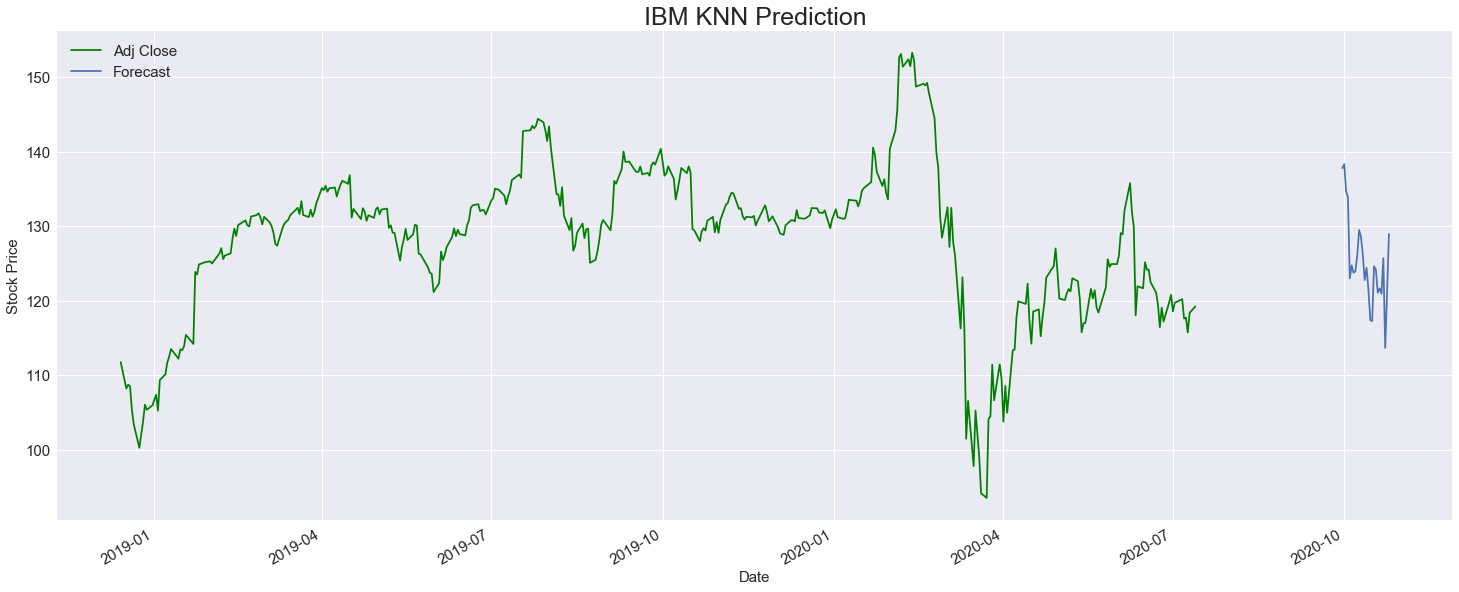

In [37]:
forecast_set = k_nearest.predict(X_lately)
relevant_df['Forecast'] = np.nan

final_tested_date = relevant_df.iloc[-1].name
latest_pred = final_tested_date
next_pred = latest_pred + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_pred
    next_pred += datetime.timedelta(days=1)
    relevant_df.loc[next_date] = [np.nan for _ in range(len(relevant_df.columns)-1)]+[i]
plt.figure(figsize=(25,10))
plt.title('IBM KNN Prediction', fontsize=25)
relevant_df['Adj Close'].tail(500).plot(fontsize=15, color = 'green') # 90 days historical data
relevant_df['Forecast'].tail(500).plot(fontsize=15) # 50 days future estimate
plt.legend(loc=2, fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Stock Price', fontsize=15)

##### Plotting Prediction for ARIMA

In [38]:
y = df['Adj Close']
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = model.fit()
        except:
            continue
model = sm.tsa.statespace.SARIMAX(y, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12), enforce_stationarity=False,
                                            enforce_invertibility=False)
results = model.fit()

C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5664      0.832      0.681      0.496      -1.064       2.196
ma.L1         -0.5569      0.839     -0.663      0.507      -2.202       1.088
ar.S.L12      -0.4929      0.011    -43.633      0.000      -0.515      -0.471
sigma2         4.9659      0.076     65.458      0.000       4.817       5.115


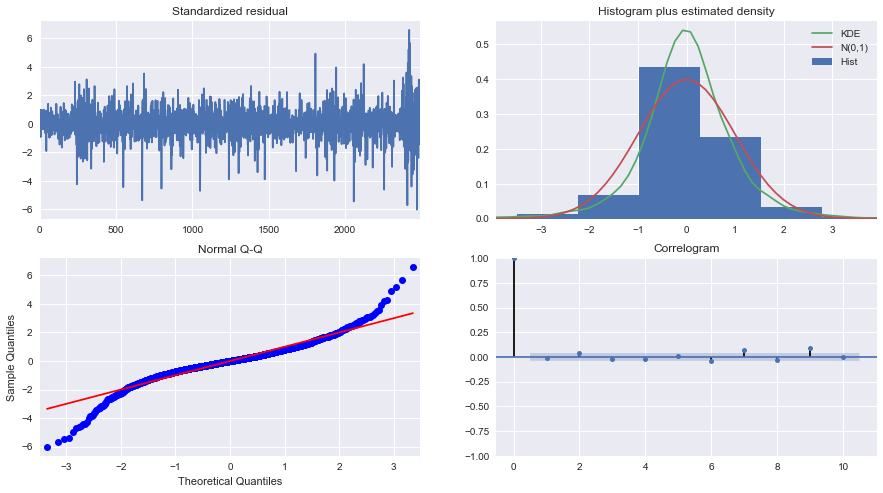

In [39]:
print(results.summary().tables[1])
results.plot_diagnostics(figsize=(15, 8))
plt.show()

            lower Adj Close  upper Adj Close
Date                                        
2020-07-07       116.376796       125.112104
2020-07-08       113.829754       122.565062
2020-07-09       112.532587       121.267894
2020-07-10       112.039703       120.775011
2020-07-13       114.289947       123.025254
Mean Square Error is: 26.125
Root Mean Square Error is: 5.111266283535745


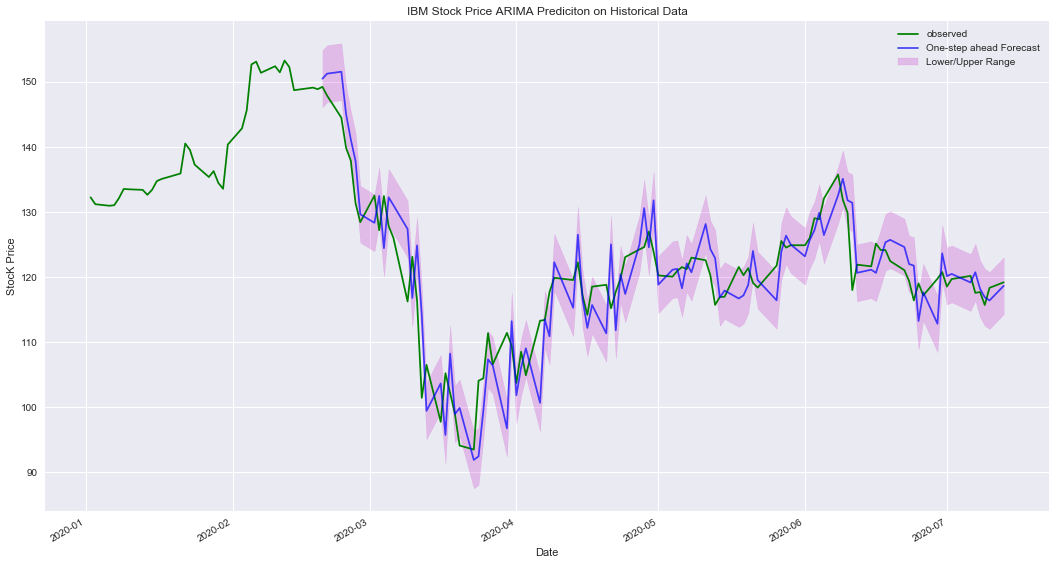

In [40]:
pred = results.get_prediction(start=('2020-02-20'), dynamic=False)
predicted_confidence_interval = pred.conf_int()
print(predicted_confidence_interval.tail())
ax = y['2020':].plot(label='observed', color = 'Green')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(18, 10), color = 'blue')
ax.fill_between(predicted_confidence_interval.index,
                predicted_confidence_interval.iloc[:, 0],
                predicted_confidence_interval.iloc[:, 1], color='m', alpha=.2, label = 'Lower/Upper Range')
ax.set_xlabel('Date')
ax.set_ylabel('StocK Price')
plt.title('IBM Stock Price ARIMA Prediciton on Historical Data')
plt.legend()

y_predicted = pred.predicted_mean
y_true = y['2017-01-01':]
mse = ((y_predicted - y_true)**2).mean()
print('Mean Square Error is:', round(mse, 4))
print('Root Mean Square Error is:', np.sqrt(mse))

C:\Users\Brand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


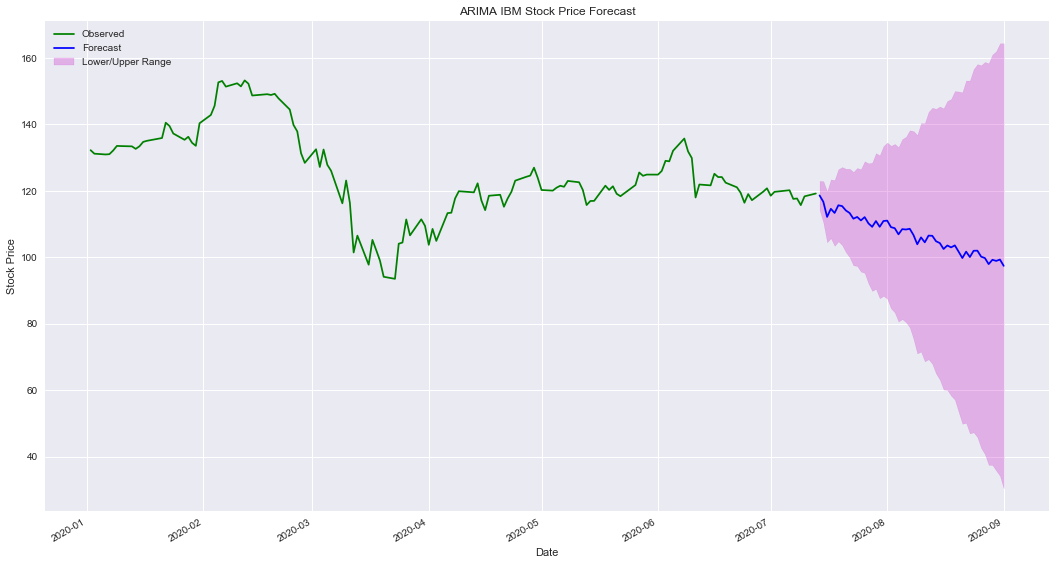

In [41]:
arima_forecast = results.get_forecast(steps=50) # Forecast 50 days into the future

predicted_confidence_interval = arima_forecast.conf_int()
predicted_confidence_interval['Date'] = pd.date_range(start='2020-7-14', periods=len(predicted_confidence_interval), freq='D')
predicted_confidence_interval.set_index('Date', inplace=True)

predicted_confidence_interval['Mean'] = (predicted_confidence_interval['lower Adj Close'] + predicted_confidence_interval['upper Adj Close']) / 2
predicted_confidence_interval.head()

ax = y['2020'].plot(label='Observed', figsize=(18, 10), color = 'Green')
predicted_confidence_interval['Mean'].plot(ax=ax, label='Forecast', color = 'blue')
ax.fill_between(predicted_confidence_interval.index,
                predicted_confidence_interval.iloc[:, 0],
                predicted_confidence_interval.iloc[:, 1], color = 'm', alpha=.25, label = 'Lower/Upper Range')
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
plt.title('ARIMA IBM Stock Price Forecast')
plt.legend(loc = 2)
plt.show()